# **Iris Dataset**

Source of dataset: https://archive.ics.uci.edu/dataset/53/iris

# 1. Setup:

In [1]:
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets

# 2. Load the modified Iris dataset:

In [2]:
# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Prepare features (X) and target (y)
X_iris = iris.data  # Features
y_iris = iris.target  # Target

In [5]:
# Define classifiers
classifiers = {
    'Linear SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Define the partitions for training and testing
partitions = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]

# Store results for each classifier, partition, and metric
results = {classifier_name: [] for classifier_name in classifiers}

# Perform training, validation, and testing
for classifier_name, classifier in classifiers.items():
    for train_size, test_size in partitions:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size=train_size, test_size=test_size, random_state=42)
        
        # Train the classifier
        classifier.fit(X_train, y_train)
        
        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
        test_accuracy = accuracy_score(y_test, classifier.predict(X_test))
        
        # Cross-validation for validation accuracy
        validation_accuracy = np.mean(cross_val_score(classifier, X_train, y_train, cv=5))
        
        # Get the hyperparameters for each classifier
        hyperparameters = classifier.get_params()  # This gets the hyperparameters

        # Store the results
        results[classifier_name].append({
            'Train Size': f"{train_size*100}/{test_size*100}",
            'Training Accuracy': train_accuracy,
            'Testing Accuracy': test_accuracy,
            'Validation Accuracy': validation_accuracy,
            'Hyperparameters': hyperparameters  # Include hyperparameters in the results
        })



# 3. Display Classifer Results:

In [6]:
# Display results for each classifier
for classifier_name, classifier_results in results.items():
    print(f"\n{classifier_name} Results:")
    for result in classifier_results:
        print(f"Split: {result['Train Size']}")
        print(f"  Training Accuracy: {result['Training Accuracy']:.4f}")
        print(f"  Testing Accuracy: {result['Testing Accuracy']:.4f}")
        print(f"  Validation Accuracy: {result['Validation Accuracy']:.4f}")
        print(f"  Hyperparameters: {result['Hyperparameters']}\n")  # Print hyperparameters


Linear SVM Results:
Split: 20.0/80.0
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9750
  Validation Accuracy: 0.9667
  Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Split: 50.0/50.0
  Training Accuracy: 0.9867
  Testing Accuracy: 1.0000
  Validation Accuracy: 0.9333
  Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Split: 80.0/20.0
  Training Accuracy: 0.9750
  Testing Accuracy: 1.0000
  Validation Accuracy: 0.9583
  Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 20

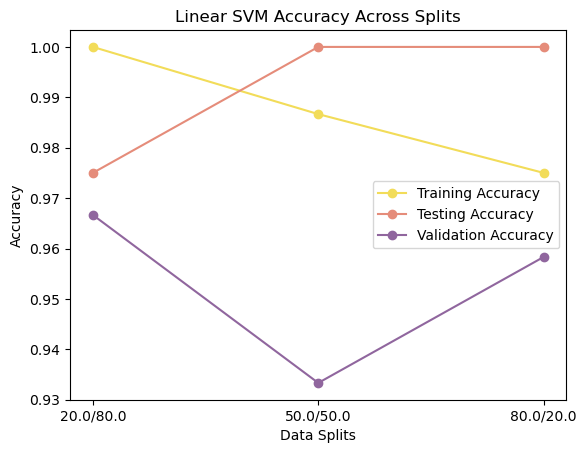

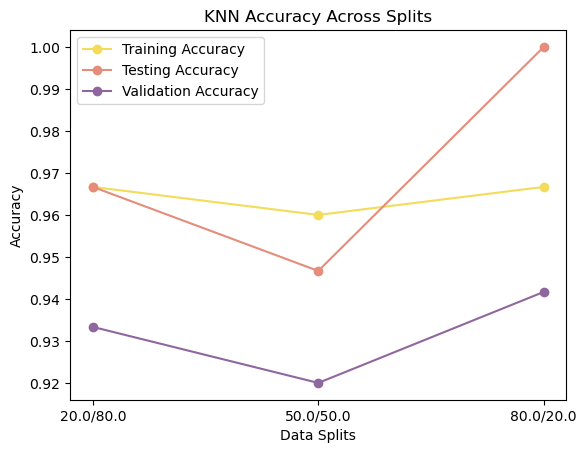

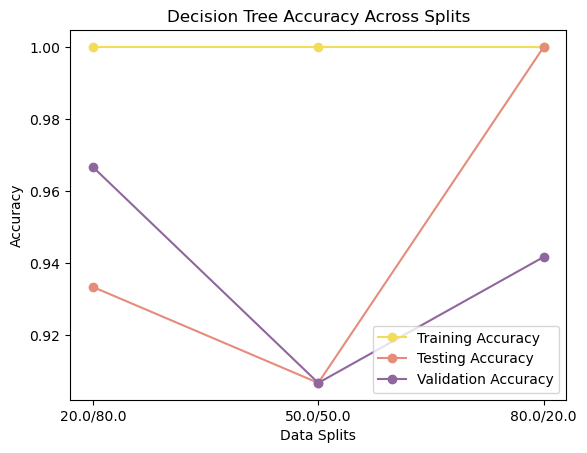

In [8]:
# Visualize accuracies across different data splits for each classifier using line plots
for classifier_name, classifier_results in results.items():
    splits = [result['Train Size'] for result in classifier_results]
    train_accuracies = [result['Training Accuracy'] for result in classifier_results]
    test_accuracies = [result['Testing Accuracy'] for result in classifier_results]
    validation_accuracies = [result['Validation Accuracy'] for result in classifier_results]
    
    # Plot line graphs for training, testing, and validation accuracies
    plt.plot(splits, train_accuracies, marker='o', label='Training Accuracy', color='#f2dc59')
    plt.plot(splits, test_accuracies, marker='o', label='Testing Accuracy', color='#e58c7a')
    plt.plot(splits, validation_accuracies, marker='o', label='Validation Accuracy', color='#90669e')

    plt.xlabel('Data Splits')
    plt.ylabel('Accuracy')
    plt.title(f'{classifier_name} Accuracy Across Splits')
    plt.legend()
    plt.show()
